In [1]:
import pandas as pd
import numpy as np
idmode = "partyid"
scaleddf=pd.read_csv('Data_party_qs_removed_enumScale(for q2).csv')
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Other"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "No - none"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Don't know"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Scottish National Party (SNP)"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Plaid Cymru"],inplace=True)
scaleddfnoid = scaleddf.drop(idmode,axis = 1)

label = scaleddf[idmode]
vals = scaleddfnoid.values
print(type(scaleddf))

kmeansdata = scaleddf.drop([idmode],axis =1)
kmeansmatrix = kmeansdata.to_numpy()
scaleddf = scaleddf.reset_index(drop=True)
print(np.unique(label))


FileNotFoundError: [Errno 2] No such file or directory: 'Data_party_qs_removed_enumScale(for q2).csv'

(8, 64)
Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62'],
      dtype='object')
0                 PCA
1    No Dim Reduction
2                TSNE
3           LDA to 5D
4                 NCA
5                 QDA
6        LDA Then QDA
7                 LDA
Name: Unnamed: 0, dtype: object


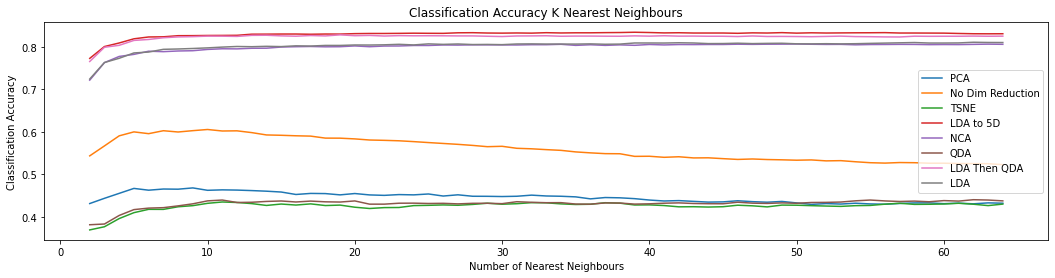

In [15]:
scaleddf=pd.read_csv("purity_knn.csv")
import matplotlib.pyplot as plt
purities = scaleddf.to_dict()
print(np.shape(scaleddf))
print(scaleddf.columns)
print(scaleddf['Unnamed: 0'])
names = scaleddf['Unnamed: 0']
listresults = scaleddf.drop('Unnamed: 0',axis=1).values.tolist()


fig, ax = plt.subplots()
fig.set_size_inches(18,4)
clusters = range(2,65)
c=0
for i in names:
    ax.plot(clusters,listresults[c],label = i)
    ax.set_title("Classification Accuracy K Nearest Neighbours")
    ax.legend()
    ax.set_ylabel("Classification Accuracy")
    ax.set_xlabel("Number of Nearest Neighbours")
    """ax[1].plot(clusters,f1s[i],label = i)
    ax[1].set_title("F1 With KMeans Optimal Assignments")
    
    
    ax[1].set_ylabel("F1 Scores")"""
    c+=1


In [3]:
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from purity_check import purity_check

voteorpref = idmode

def f1_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = data.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number



def kmeans_distance(cluster,data_compare,n_clusters):
    data = scaleddf
    cost_matrix = np.zeros([data_compare.shape[0],n_clusters])
    for i in range(data_compare.shape[0]):
        point_costs = []
        for c in range(n_clusters):
            diss = np.linalg.norm(data_compare[i,:]-cluster[c,:])
            cost_matrix[i,c]=diss
    return cost_matrix


def optimal_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    #scaleddf = scaleddf.reset_index(drop=True)
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = scaleddf.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        name_count = 0 
        for x in range(len(optimal_cluster_assignments_names)):
                if name in optimal_cluster_assignments_names[x]:
                    name_count += 1
        if name_count != 0:
            name = name + str(name_count+1)
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number


"""
def kmpurity2(input,curmethod):
    
    purity_values = [] 
    cluster_numbers = []
    clusters = range(6,10)
    for i in clusters:
        #print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i, random_state=0)
        kmeans.fit_predict(input)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,input,i)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        #print(optimal_assignments)
        clusterpops = optimal_assignments[0]
        optimal_assignments = optimal_cluster_assignments_lists(optimal_assignments)
        #print(optimal_assignments)
        wrongcounts = list(np.zeros(i+1))
        optimaldict = dict()
        optimaldict2 = dict()
        for i in range(len(optimal_assignments[0])):
            #print(optimal_assignments[1][i])
            optimaldict[optimal_assignments[1][i]]=optimal_assignments[0][i]
            optimaldict2[optimal_assignments[0][i]]=optimal_assignments[1][i]
        #print(optimaldict)
        for i in range(len(optimal_assignments[1])):#for each cluster
            #optimal_assignments[0][i] is ith name
            # optimal_assignments[1][i] is ith cluster num in kmlabels 
            for k in range(len(kmeans.labels_)):#for each value
                #k is original data index
                if optimal_assignments[1][i] != kmeans.labels_[k]:#kth point not assigned to current cluster
                    #if point k not assigned to cluster
                    #dont need to check  its
                    continue
                #by this point kth point is definetly assigned to ith cluster
                if scaleddf[idmode][k] not in optimal_assignments[0][i]:
                    
                    #if correct label not in name from optimal assinments
                    #optimaldict[kmeans.labels_[k]]  maps the label to name 
                    #print(optimaldict2[kmeans.labels_[k]])
                    wrongcounts[optimal_assignments[1][i]]+=1
        
        
        clusterpops = list(np.zeros(len(np.unique(kmeans.labels_))))
        

        for i in kmeans.labels_:
            clusterpops[i]+=1
        #print(clusterpops)
        #print(optimal_assignments[0])
        impurities = np.zeros(len(clusterpops))
        for j in range(len(clusterpops)):
            impurities[j]=(clusterpops[j]-wrongcounts[j])/clusterpops[j]
            
        #mean_purity = purity_check(optimal_assignments[0],scaleddf,i,vote_or_pref=idmode)
        #print("impurity stuff \n")
        #print(impurities)
        #print(wrongcounts)
        #print(clusterpops)
        mean_purity =np.mean(impurities)
        for i in impurities:
            if i > 1:
                print("reeeeeee\n\n\nreeeeeeeee")
                print(impurities)
                
                print(clusterpops)
                print(wrongcounts)
                print(mean_purity)
                print(np.sum(clusterpops))
                print((np.sum(wrongcounts)/np.sum(clusterpops)))
        
        #print(impurities)
                
        
        print(mean_purity)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(clusters,purity_values)

"""
#normal k means
"""def kmpurity(input,curmethod):
    purity_values = [] 
    cluster_numbers = []
    for i in range(6,18):
        print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i+1)
        kmeans.fit_predict(input)
        mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(purity_values)
    """






def kmpurity(embedding,curmethod):
    clusters = range(6,18)
    data = scaleddf
    labels = scaleddf[idmode]
    f1values=[]
    purity_values=[]
    for n_clusters in clusters:
        kmeans = KMeans(n_clusters, random_state=0)
        kmeans.fit_predict(embedding)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,embedding,n_clusters)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        cluster_assignments_names, cluster_assignments_number = f1_cluster_assignments_lists(optimal_assignments)
        cluster_assignments = pd.DataFrame({'Party Vote':data[idmode]})
        cluster_assignments['FirstAssignment'] = kmeans.labels_
        for x in range(len(cluster_assignments_number)):
            cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].replace(int(cluster_assignments_number[x]),cluster_assignments_names[x])
        cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].astype('category')
        #cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].cat.remove_unused_categories()
        #cluster_assignments['Party Vote'] = cluster_assignments['Party Vote'].cat.remove_unused_categories()
        #sum_of_squared_distances.append(kmeans.inertia_)
        y_true = np.transpose(np.array(cluster_assignments['Party Vote']))
        y_pred = np.transpose(np.array(cluster_assignments['FirstAssignment']))
        f1 = f1_score(y_pred,y_true,average='micro')
        f1values.append(f1)
        mean_purity = purity_check(kmeans.labels_,scaleddf,n_clusters,vote_or_pref=idmode)
        purity_values.append(mean_purity)
        print(mean_purity)
    print(curmethod)
    purities[curmethod]=purity_values.copy()
    f1s[curmethod]=f1values.copy()
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].plot(clusters, purity_values)
    ax[0].set_title('Purity')
    print(f1values)
    print(np.shape(f1values))
    ax[1].plot(clusters,f1values)
    ax[1].set_title("f1 Scores")
    

#f1s=dict()
#purities = dict()

In [4]:
scaleddf = scaleddf.reset_index(drop=True)
data = scaleddf
purities = dict()
f1s=dict()

In [24]:
print(np.unique(scaleddf[idmode]))

['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']


In [ ]:
df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])

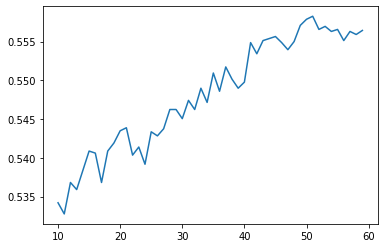

In [99]:
from sklearn.decomposition import PCA
pcadata = PCA(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(pcadata,"PCA")

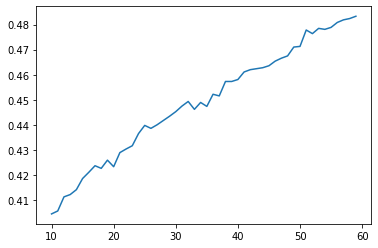

In [100]:
kmpurity(scaleddf.drop(idmode,axis=1),"No Dim Reduction")

In [102]:
print(error_rates.keys())

dict_keys(['PCA', 'No Dim Reduction'])


In [7]:
correct_rates = dict()

from sklearn.neighbors import KNeighborsClassifier
def kmpurity(data,curmethod):#same name cos lazy this the knn one
    from sklearn.model_selection import train_test_split
    y=scaleddf[idmode]
    X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.33)
    error_rate = []
    k=range(2,65)
    for i in k:
        print(i)
        knn = KNeighborsClassifier(n_neighbors=i,p=1,algorithm="ball_tree").fit(X_train,y_train).predict(X_test)
    
    
        error_rate.append(np.mean(knn == y_test))
    plt.plot(k,error_rate)
    correct_rates[curmethod]=error_rate

<BarContainer object of 6 artists>

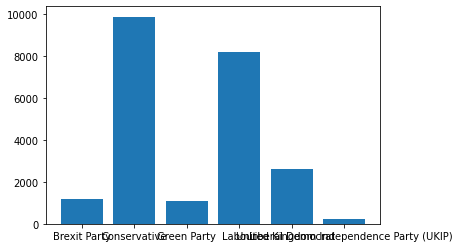

In [47]:
import matplotlib.pyplot as plt
#scaleddf = ldadata.copy()
knndata = scaleddf.copy()

knndata.drop(knndata.index[knndata[idmode] == "Liberal Democrat"],inplace=True)

uniques =list(np.unique(scaleddf[idmode]))
targetindex = uniques.index("Liberal Democrat")
counts = list(np.zeros(len(np.unique(scaleddf[idmode]))))

dictionary = dict(zip(uniques, range(len(uniques))))

for i in scaleddf[idmode]:
    counts[uniques.index(i)]+=1
plt.bar(uniques,counts)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=16)


print(np.unique(knndata[idmode]))
neigh = neigh.fit(knndata.drop(idmode,axis=1),knndata[idmode])
print(np.unique(scaleddf[idmode]))
prediction = neigh.predict(scaleddf.drop(idmode,axis=1))
print(np.unique(prediction))




['Brexit Party' 'Conservative' 'Green Party' 'Labour'
 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' 'Green Party' 'Labour']


In [50]:
onlylibdem = neigh.predict(scaleddf.loc[scaleddf[idmode] == "Liberal Democrat"].drop(idmode,axis=1))
print(np.unique(onlylibdem))

['Conservative' 'Green Party' 'Labour']


In [64]:
uniquesreassign = np.unique(onlylibdem)
dictreassign = dict(zip(uniquesreassign, range(len(uniquesreassign))))
countsreassign = np.zeros(len(uniquesreassign))
for i in onlylibdem:
    i = dictreassign[i]
    countsreassign[i]+=-1
print(countsreassign)
print(np.sum(countsreassign))
print(len(onlylibdem))

[-1756.    -2.  -845.]
-2603.0
2603


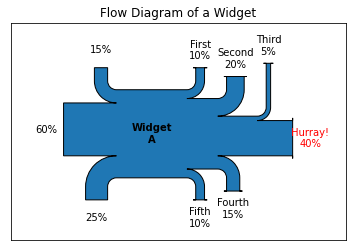

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 15, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

[1756.0, 2.0, 845.0]


'\nSankey(flows=sankeyvals,\n       labels=sankeylabels,\n       orientations=[0, 1,0,1]).finish()\nplt.title("The default settings produce a diagram like this.")\n\n'

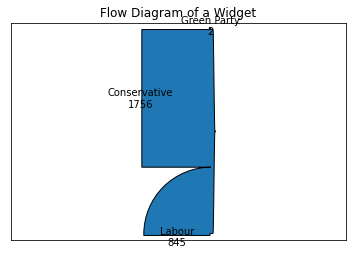

In [83]:
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey
#["LibDems"]+
#[np.sum(countsreassign)]+
sankeylabels = list(uniquesreassign)
sankeyvals = list(-1*countsreassign)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f')
sankey.add(flows=sankeyvals,
       labels=sankeylabels,
       orientations = [0,1,-1],
       pathlengths = [0.25,0.25,0.25])
diagrams = sankey.finish()      


print(sankeyvals)
"""
Sankey(flows=sankeyvals,
       labels=sankeylabels,
       orientations=[0, 1,0,1]).finish()
plt.title("The default settings produce a diagram like this.")

"""


4
['Brexit Party' 'Conservative' 'Green Party' 'Labour']
{'Brexit Party': 0, 'Conservative': 1, 'Green Party': 2, 'Labour': 3}
[0.0, 1756.0, 2.0, 845.0]
[1190.0, 9873.0, 1079.0, 8178.0, 242.0]


ValueError: operands could not be broadcast together with shapes (5,) (4,) 

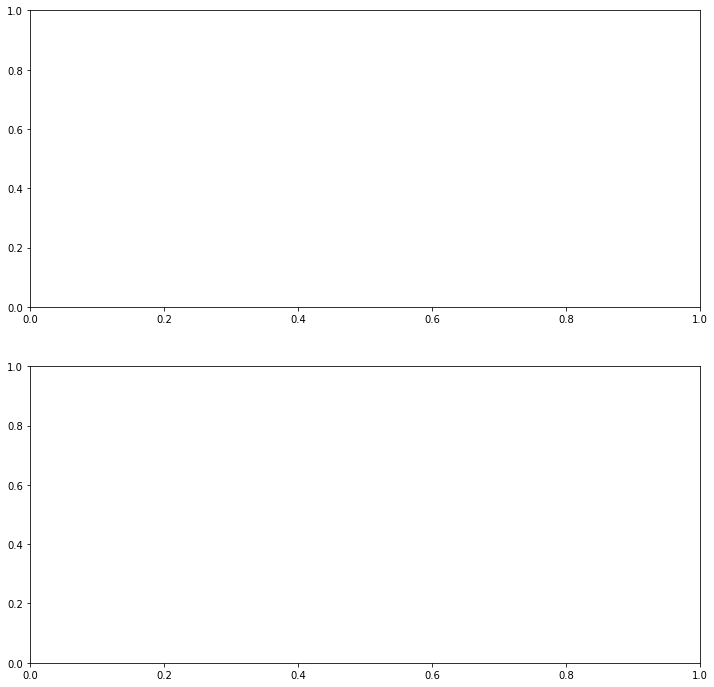

In [46]:
fig, ax = plt.subplots(2)
uniques2 = np.unique(prediction)
counts2 = list(np.zeros(len(uniques2)))
dictionary2 = dict(zip(uniques2, range(len(uniques2))))



fig.set_size_inches(12,12)
print(len(uniques2))
print(uniques2)
print(dictionary2)
for i in onlylibdem:
    i = dictionary2[i]
    counts2[i]+=1
temp = counts.copy()
del temp[uniques.index("Liberal Democrat")]

print(counts2)
print(temp)
after = np.array(temp)+np.array(counts2)

print(np.shape(uniques))
print(np.shape(counts))
print(np.shape(temp))
print(np.shape(uniques2))

uniques2[4]="UKIP"
uniques[5]="UKIP"
ax[1].bar(uniques,counts)
ax[0].bar(uniques2,after)
print(counts)
print(after)

[9.0, 1747.0, 13.0, 834.0]
2603.0
[2603.0]
[2603.0, 9.0, 1747.0, 13.0, 834.0]
['Libdems', 'Brexit Party', 'Conservative', 'Green Party', 'Labour']
[9.0, 1747.0, 13.0, 834.0]


ValueError: The shapes of 'flows' (5,) and 'orientations' (6,) are incompatible

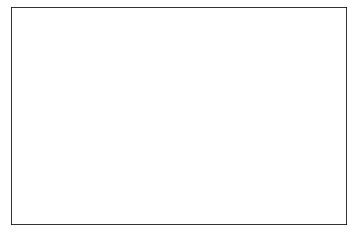

In [44]:
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey
total =  np.sum(counts2)
print(counts2)
print(total)
flow=[total]
print(flow)
for i in counts2:
       flow.append(i)
print(flow)
sankeylab = ["Libdems"]
for i in uniques2:
       sankeylab.append(i)

print(sankeylab)
print(counts2)
Sankey(flows=flow,
       labels=sankeylab,
       orientations=[0, 1,1, 1, 1,1]).finish()
plt.title("The default settings produce a diagram like this.")


[namespace(patch=<matplotlib.patches.PathPatch at 0x18f7fb2b518>,
           flows=array([ 1., -1.]),
           angles=[0, 0],
           tips=array([[0.16954982, 0.        ],
                       [0.6947228 , 0.        ]]),
           text=Text(0, 0, '0.0034575489819439107'),
           texts=[Text(0.01954981558863997, 0.0, '1'),
                  Text(0.8447228045239584, 0.0, '1')]),
 namespace(patch=<matplotlib.patches.PathPatch at 0x18f7fb5ac18>,
           flows=array([ 1., -1.]),
           angles=[0, 0],
           tips=array([[0.16954982, 0.        ],
                       [0.6947228 , 0.        ]]),
           text=Text(0, 0, '0.6711486746062236'),
           texts=[Text(0.01954981558863997, 0.0, '1'),
                  Text(0.8447228045239584, 0.0, '1')]),
 namespace(patch=<matplotlib.patches.PathPatch at 0x18f965a34a8>,
           flows=array([ 1., -1.]),
           angles=[0, 0],
           tips=array([[0.16954982, 0.        ],
                       [0.6947228 , 0.    

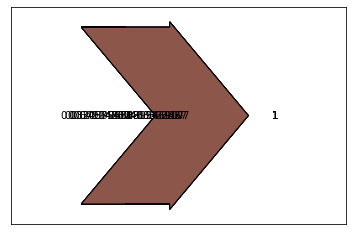

In [26]:
sankey = Sankey()
for i in flow:
    sankey.add(i)
sankey.finish()

In [ ]:
print(type(purities))
print(np.shape(purities))
print(purities)
for i in purities.keys():
    plt.plot(range(6,18),purities[i],label = i)
    
    plt.legend()
plt.xlabel("Number of Clusters")
plt.ylabel("Purity of Clusters")

plt.title("Comparison of Kmeans Purities with Dim Reduction")

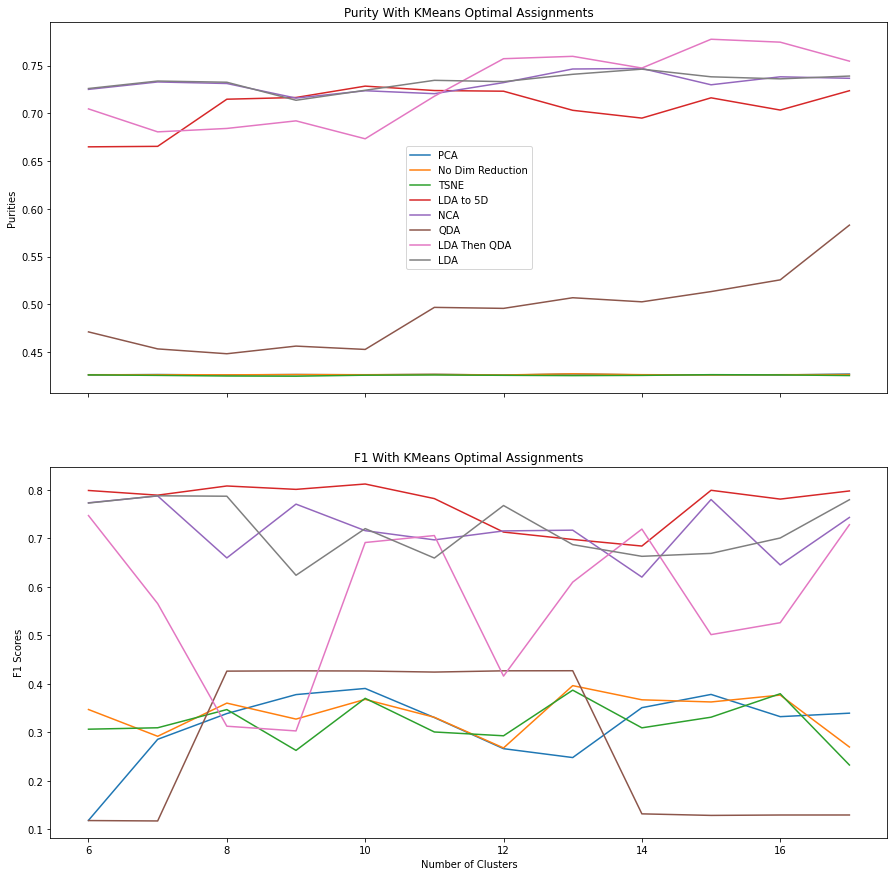

In [16]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(15,15)
clusters = range(6,18)
for i in purities.keys():
    ax[0].plot(clusters,purities[i],label = i)
    ax[0].set_title("Purity With KMeans Optimal Assignments")
    ax[0].legend()
    ax[0].set_ylabel("Purities")
    ax[1].plot(clusters,f1s[i],label = i)
    ax[1].set_title("F1 With KMeans Optimal Assignments")
    
    ax[1].set_xlabel("Number of Clusters")
    ax[1].set_ylabel("F1 Scores")

In [124]:
#print(pd.DataFrame.from_dict(purities, orient='index'))
purititydf = pd.DataFrame.from_dict(correct_rates, orient='index')
#f1df =pd.DataFrame.from_dict(f1s, orient='index')
purititydf.to_csv("purity_knn")


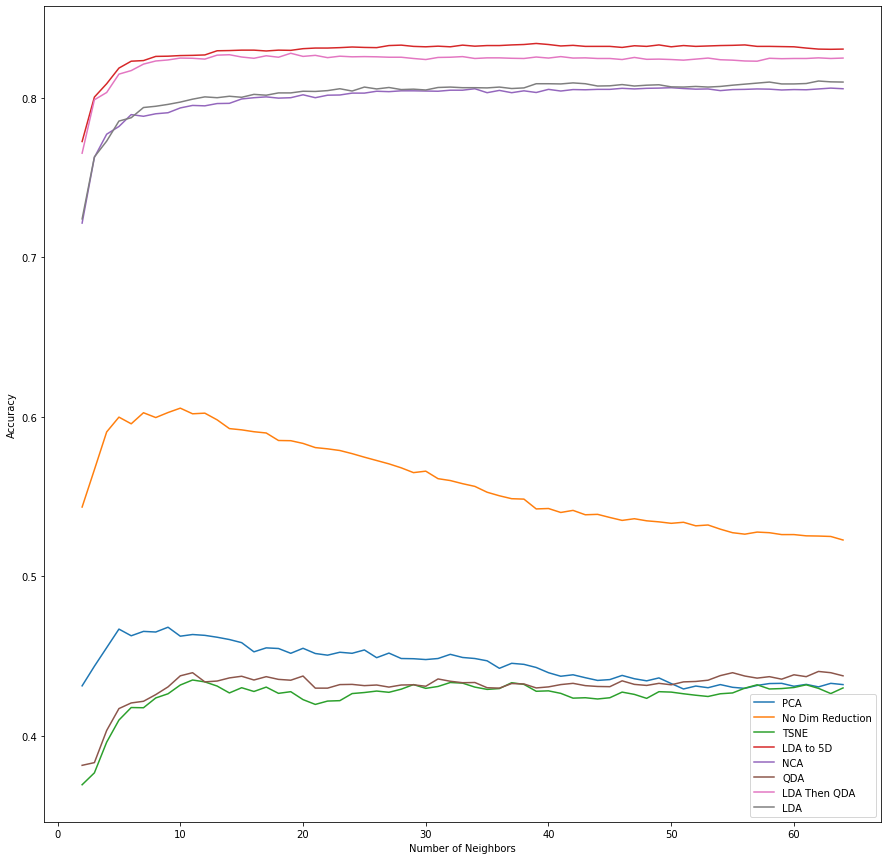

In [126]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15,15)
clusters = range(2,65)
for i in correct_rates.keys():
    ax.plot(clusters,correct_rates[i],label = i)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Neighbors")
ax.legend()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


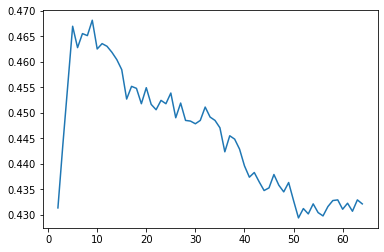

In [113]:
from sklearn.decomposition import PCA
pcadata = PCA(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(pcadata,"PCA")



In [114]:
#kmeansdata = scaleddf.drop(['generalelectionVote','envirogrowth','immigcultural','immigself','immigecon','euintegrationself','happyeuleave'])


In [115]:
"""
purity_values = [] 
cluster_numbers = []
for i in range(6,18):
    print(i)
    cluster_numbers.append(i)
    kmeans = KMeans( n_clusters = i+1)
    kmeans.fit_predict(kmeansmatrix)
    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
    purity_values.append(mean_purity)"""

'\npurity_values = [] \ncluster_numbers = []\nfor i in range(6,18):\n    print(i)\n    cluster_numbers.append(i)\n    kmeans = KMeans( n_clusters = i+1)\n    kmeans.fit_predict(kmeansmatrix)\n    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)\n    purity_values.append(mean_purity)'

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


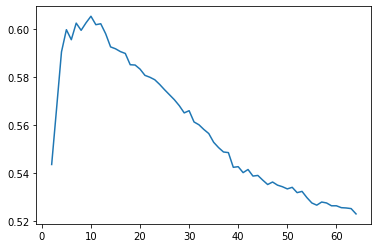

In [116]:
kmeansmatrix=scaleddf.drop(idmode,axis=1)
kmpurity(kmeansmatrix,"No Dim Reduction")


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


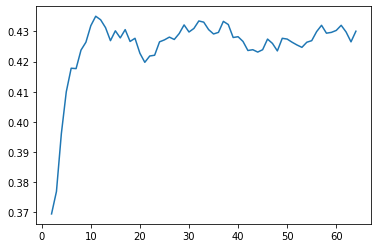

In [117]:
from sklearn.manifold import TSNE
tsnedata = TSNE(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(tsnedata,"TSNE")

In [20]:
reassign(lda5ddata,"LDA to 5D",'Green Party',40)

<bound method NDFrame.head of               0         1         2         3         4
0      1.477523 -0.377564  1.311509 -0.315198  0.199537
1      1.750220  0.141183  0.287342 -0.218184 -0.138149
2      1.652770  1.817070  0.904183  0.077285  0.610170
3      2.167014 -0.604852 -1.014006 -0.182248  1.042792
4      3.125800  1.983909  0.765246  0.676500  0.343584
...         ...       ...       ...       ...       ...
23160  2.531198  0.792157  0.186353  0.094114  0.127925
23161 -2.954076 -0.156583  0.531806 -1.142533  0.806267
23162 -1.565395 -1.519914  0.736369 -0.891237 -0.369787
23163 -2.568535 -0.592148  0.854845  0.813055  0.651935
23164 -1.793411  0.596726  0.214619 -0.064533 -0.232281

[23165 rows x 5 columns]>


KeyError: "None of [Int64Index([   22,    35,    39,    44,    56,    71,    98,    99,   102,\n              111,\n            ...\n            22954, 22959, 22984, 23055, 23078, 23103, 23120, 23143, 23145,\n            23152],\n           dtype='int64', length=1079)] are in the [columns]"

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


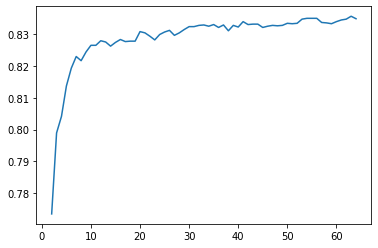

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
lda5ddata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(lda5ddata,"LDA to 5D")




In [19]:
correct_rates = dict()

from sklearn.neighbors import KNeighborsClassifier
def reassign(data,curmethod,party,k):#same name cos lazy this the knn one
    from sklearn.model_selection import train_test_split
    
    
    data =pd.DataFrame(data)
    print(data.head)
    dataforeassign = scaleddf.loc[scaleddf[idmode] == party]
    print(dataforeassign.index)
    dataforeassign = data[dataforeassign.index]
    trainingdata = data.drop(scaleddf.loc[scaleddf[idmode] == party].index)
    traininglabels = (scaleddf.drop(scaleddf.loc[scaleddf[idmode] == party].index))[idmode]
    
    knn = KNeighborsClassifier(n_neighbors=k,p=1,algorithm="ball_tree").fit(trainingdata,traininglabels)
    
    reassignments = knn.predict(dataforeassign)

    
    ratios={0 for i in np.unique(reassignments)}
    sumofreassign =0
    for i in reassignments:
        ratios[i]+=1
        sumofreassign +=1
    for i in ratios.keys:
        ratios[i]=ratios[i]/sumofreassign
        
    plt.bar(ratios)
    


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


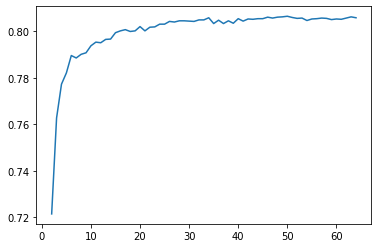

In [119]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
ncadata =nca.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ncadata,"NCA")


In [120]:
"""u_labels = np.unique(scaleddf[idmode])
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)
    plt.legend(markerscale =6)
    
plt.show()"""

'u_labels = np.unique(scaleddf[idmode])\nfig = plt.figure(figsize=(20,20))\nax = fig.add_subplot()\nfor i in u_labels:\n    if i == "No - none" or i == "Don\'t know"or i ==\'Scottish National Party (SNP)\' or i == "Plaid Cymru":\n        continue\n    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)\n    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)\n    plt.legend(markerscale =6)\n    \nplt.show()'

C:\Users\kiera\anaconda3\envs\intro_to_ai\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


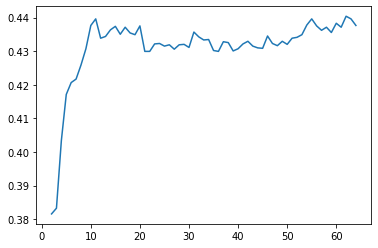

In [121]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(kmeansdata,scaleddf[idmode])
qdadata = clf.decision_function(kmeansdata)
kmpurity(qdadata,"QDA")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


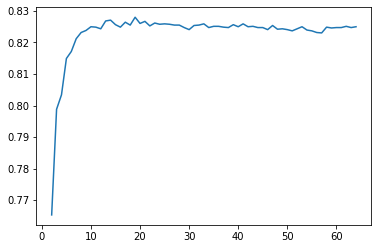

In [122]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
clf = QuadraticDiscriminantAnalysis().fit(ldadata,scaleddf[idmode])
ldaqdadata = clf.decision_function(ldadata)
kmpurity(ldaqdadata,"LDA Then QDA")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


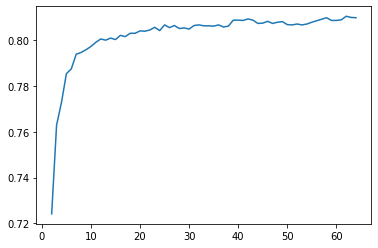

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ldadata,"LDA")

